# Drawn Matches: A Thing of the Past?
Abhimanyu Vasishth, 13 September 2018

## Introduction

The recently concluded England-India Test Series, which England clinched 4-1 at The Oval was the third test series in a row without a drawn match (Sri Lanka v South Africa and Bangladesh v West Indies being the two that preceded it). This leads to an interesting research question: are there fewer drawn matches now than ever before in the 142 years of international test cricket?

## Hypothesis

It seems like the case for this being the golden age for results in test cricket (i.e. games won by either side) is strong. Interest in test cricket is dwindling, thanks to the franchise T20 epidemic. In order to regurgitate an interest in test cricket, curators are perhaps creating pitches that either favour the hosts - leading to more home wins - or pitches that offer a good contest between bat and ball - leading to an increased likelihood of obtaining a result. 

## Methodology

#### Visualization of number of draws/results

#### Statistical tests for draws in the last 10 years vs before

#### Explaining trends

#### Calculating probability of a given game being a draw now

#### Examining explanations for the hypotheses

In [65]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

### Going from 1877 to 2018

Getting all the match results by year from cricinfo

In [9]:
new_url = 'http://stats.espncricinfo.com/ci/content/records/307847.html'
new_url_req = requests.get(new_url)
print(new_url_req.status_code)

200


In [25]:
test_soup = BeautifulSoup(new_url_req.content, 'html.parser')
decades = test_soup.findAll("ul", {"class": "category-noindent"})
print(len(decades)) # Should be 15 decades of test cricket
list_of_years = []
for item in decades:
    years = item.findAll("a", {"class": "QuoteSummary"})
    for year in years:
        year_dict = {}
        year_entry = int(year.get_text().strip())
        url = "http://stats.espncricinfo.com{}".format(year.get('href').strip())
        year_dict["year"] = year_entry
        year_dict["url"] = url
        list_of_years.append(year_dict)

15


In [26]:
print(len(list_of_years)) # Should be 128 years of test cricket since 1877

128


In [29]:
list_of_tests = []
for item in list_of_years:
    req = requests.get(item["url"])
    match_soup = BeautifulSoup(req.content, 'html.parser')
    tests = match_soup.findAll("tr", {"class": "data1"})
    for test in tests:
        test_dict = {}
        details = test.findAll("td", {"nowrap": "nowrap"})
        test_dict["year"] = item["year"]
        test_dict["home"] = details[0].get_text().strip()
        test_dict["away"] = details[1].get_text().strip()
        test_dict["result"] = details[2].get_text().strip()
        test_dict["venue"] = test.findAll("td", {"class": "left"})[-1].get_text().strip()
        test_dict["number"] = int(details[-1].get_text().strip().split(' ')[-1])
        list_of_tests.append(test_dict)

### Cleaning Data

Removing duplicates e.g. when a game started in 1979 and ended in 1980 it is double counted

In [42]:
clean_dict = {}
for i in list_of_tests:
    clean_dict[i["number"]] = i
clean_list = list(clean_dict.values())
print(len(clean_list)) # Should be 2318 up until this point

2318


### Saving Clean Data

So that I can use it later without going through the bother

In [43]:
with open('cricinfo.json', 'w') as outfile:
    json.dump(clean_list, outfile)

In [44]:
with open("cricinfo.json", "r") as fd:
    cric_table = json.load(fd)

### Exploratory Data Analysis

In [45]:
df_cric = pd.DataFrame(cric_table)
print(df_cric.head())

          away          home number        result          venue  year
0        India   West Indies    367         drawn  Port of Spain  1953
1      England    Bangladesh   2227    Bangladesh          Dhaka  2016
2      England  South Africa     90  South Africa   Johannesburg  1906
3  West Indies       England    324   West Indies         Lord's  1950
4      England     Australia    464         drawn         Sydney  1959


Adding a column to reflect drawn games

In [59]:
df_cric.number = pd.to_numeric(df_cric.number)
df_cric.drawn = df_cric.result == "drawn"
df_cric.drawn*= 1
print(df_cric.dtypes)

away      object
home      object
number     int64
result    object
venue     object
year       int64
drawn      int64
dtype: object


In [60]:
print(df_cric.head(10)) # A quick sanity check

          away          home  number        result          venue  year  drawn
0        India   West Indies     367         drawn  Port of Spain  1953      1
1      England    Bangladesh    2227    Bangladesh          Dhaka  2016      0
2      England  South Africa      90  South Africa   Johannesburg  1906      0
3  West Indies       England     324   West Indies         Lord's  1950      0
4      England     Australia     464         drawn         Sydney  1959      1
5  West Indies       England    1834       England          Leeds  2007      0
6  New Zealand      Zimbabwe    1378         drawn         Harare  1997      1
7      England   West Indies    1398   West Indies  Port of Spain  1998      0
8    Sri Lanka       England    1994       England        Cardiff  2011      0
9     Pakistan   New Zealand    1536         drawn   Christchurch  2001      1


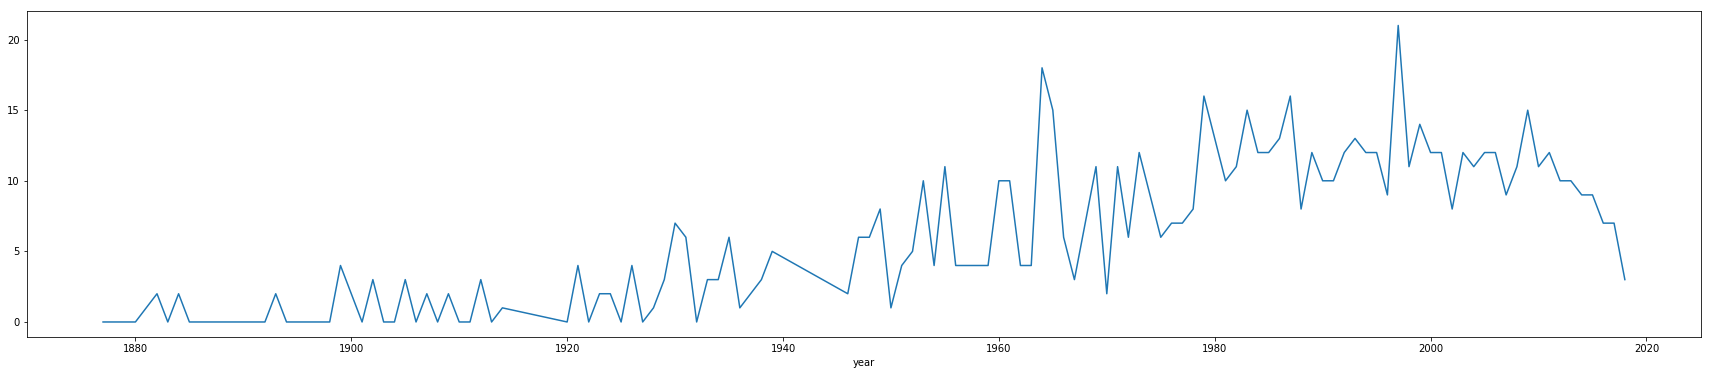

In [82]:
# Basic visual of number of drawn games
sum_draws = df_cric.groupby('year').sum().drawn
sum_draws.plot(figsize=(30,6))

In [109]:
total = df_cric.groupby('year').agg(['count','sum'])
total['prop'] = total.drawn['sum']/total.drawn['count']
print(total.prop.head())

year
1877    0.0
1879    0.0
1880    0.0
1882    0.4
1883    0.0
Name: prop, dtype: float64


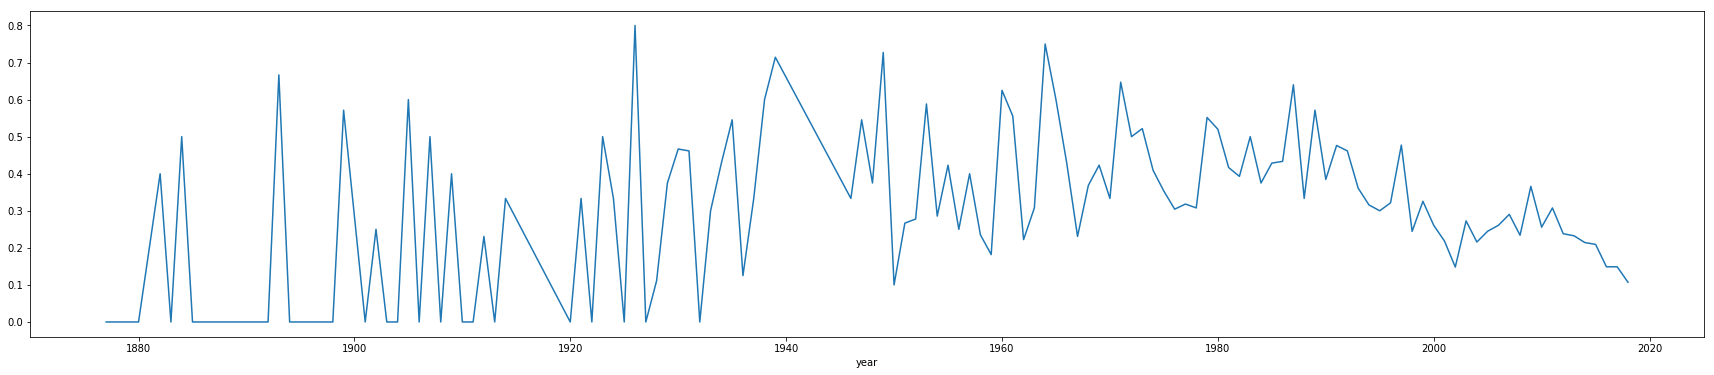

In [112]:
total.prop.plot(figsize=(30,6))

## Conclusion

Reference hypothesis

## Evaluation

What does this all mean?